## 1. Project Title: Machine Learning for Jewellry Price Optimization

This project aims to successfully predict the prices of jewellry pieces. This will allow the jewelry company reduce their dependence on gemolosists and expensive experts.

---

## 2. Methodology

This project will be carried out using the __CRISP-DM__ methodology. This is one of the more popular data science methodologies and is characterized by six important phases, which are as follows:

1. _Business Understanding_,
2. _Data Understanding_,
3. _Data Preparation_,
4. _Data Modelling_,
5. _Model Evaluation_, and
6. _Model Deployment_.

It should be noted that these phases are usually recurrent in nature (i.e., some phases may be repeated). As such, they do not necessarily follow a linear progression.

---

## 3. Tools

The tools of use for this project include:

1. _Pandas_
2. _NumPy_
3. _Matplotlib_ & _Seaborn_

#### 3.1. Pandas & NumPy

__Pandas__ is a Python library built upon the __NumPy__ library. The idea behind _Pandas_ is to be able to operate on text data, where _NumPy_ is best suited for numerical operations, irrespective of the fact that it can represent text to some degree.

#### 3.2. Matplotlib & Seaborn

__Matplotlib__ and __Seaborn__ are Python libraries for data visualization. Other alternatives include __Bokeh__ and __Plotly__.

---

<div align="center"><h1>Project Implementation via CRISP-DM</h1></div>

---

<div><h3>01. Business Understanding</h3></div>


__Gemineye Emporium__ is a boutique jewelry store based in New York City, U.S., specializing in the sale of high-quality jewelry, in both gemstones and precious metals. They are dedicated to providing customers with exquisite pieces within a market as competitive as the jewelry market.

Specifically, with all the hype about AI and ML, they are interested in leveraging the tools for predicting their jewelery prices. This will be advantageous in optimizing their prices for market, without the need for employing expensive gemologists and certified appraisers.

In order to train the needed machine learning models, the IT team at Gemineye Emporium will need data that records and describes the conditions and state of different jewellery pieces, such as the target gender of the piece, the metal the piece is made of, the gem mounted on the piece, amongst others.

---

<div><h3>02. Data Understanding</h3></div>

With the _**Business Understanding**_ out of the way, the next step is to understand the data to be obtained and used for the task. This will involve the process of __*Exploratory Data Analysis (EDA)*__.

EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it. They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis, EDA begins with a set of __questions__ and/or __hypotheses__. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

The required libraries and packages are imported first. The EDA process is carried out here as shown below. The high-level steps to follow are:

1. Import the required libraries
2. Load in the dataset
3. Analyze and observe its properties.
   * Missing data
   * Inconsistent values
   * Low categorical cardinality
   * Feature correlations
4. Report on these properties and how they might affect our final solution.

<div align="center"><h3>2.1. Enter EDA Code Here</h3></div>

In [1]:
# Import required utilities
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Seed for reproducibility
SEED = np.random.seed(seed = 2023)

In [3]:
# Import the dataset
data = pd.read_csv("Jewelry_Datasets/Jewelry_Dataset.csv")
data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "USD_Price",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem"
]

##### Cardinality

In [4]:
# Feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
USD_Price          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [5]:
data.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,USD_Price,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


#### Data summary

In [6]:
# Describe data
data.describe(include="all")

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,USD_Price,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
count,95910,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,85977,9.112500e+04,90558.000000,9.055800e+04,47743,88250,90448,61852
unique,74504,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,2,5,3,30
top,2020-10-17 12:58:28 UTC,NaN,NaN,NaN,NaN,jewelry.earring,NaN,NaN,NaN,f,red,gold,diamond
freq,26,NaN,NaN,NaN,NaN,29051,NaN,NaN,NaN,47379,69510,89081,29609
mean,NaN,2.485191e+18,1.815970e+18,1.0,1.805947e+18,NaN,8.891036e+16,362.213017,1.512644e+18,NaN,NaN,NaN,NaN
std,NaN,1.934750e+17,2.136814e+17,0.0,2.083954e+16,NaN,3.559651e+17,444.157665,2.374776e+16,NaN,NaN,NaN,NaN
min,NaN,1.924899e+18,1.313551e+18,1.0,1.313678e+18,NaN,0.000000e+00,0.990000,1.313554e+18,NaN,NaN,NaN,NaN
25%,NaN,2.379732e+18,1.515966e+18,1.0,1.806829e+18,NaN,0.000000e+00,145.620000,1.515916e+18,NaN,NaN,NaN,NaN
50%,NaN,2.524282e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000e+00,258.770000,1.515916e+18,NaN,NaN,NaN,NaN
75%,NaN,2.644347e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000e+00,431.370000,1.515916e+18,NaN,NaN,NaN,NaN


##### Missing Values

In [7]:
# Check for missing values
100 * data.isnull().sum() / len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
USD_Price          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [8]:
print(data.shape)

(95910, 13)


##### Low cardinality

In [9]:
# Number of unique values per feature
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
USD_Price          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

Apart from the target variable, which is the jewelry price, all other variables may be considered categorical in nature. Also, the _SKU_Quantity_ feature has just one unique value, giving it a variance of 0. As such, it conferrs no new informative property on the dataset.

##### Duplicate records

We eliminate duplicated rows.

In [10]:
# Get the duplicated records
num_duplicated = len(data.loc[data.duplicated()])

In [11]:
print(f"Number of duplicated records: {num_duplicated}.")

Number of duplicated records: 2589.


In [12]:
# Filter away the duplicated records
data = data.loc[~data.duplicated()]

##### Target Distribution

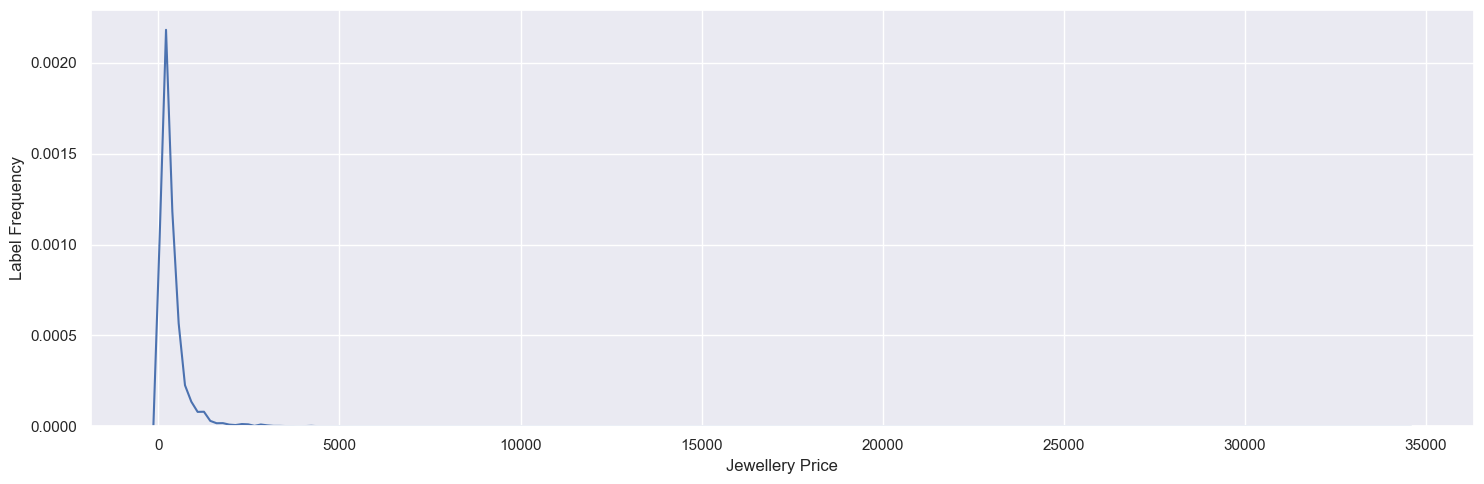

In [13]:
# Bar chart
plt.figure(figsize = (15, 5))
sns.kdeplot(data = data, x = "USD_Price")
plt.xlabel("Jewellery Price")
plt.ylabel("Label Frequency")

plt.tight_layout()
plt.show()

The jewelry prices, which are the target labels, are right-skewed i.e., most outliers exist on the high end. This may imply that most jewelry pieces are sold to  more regular, mainstream buyers, while high-value sales are rarely conducted.

##### Target Gender Analysis

According to social norms, females are more likely to be interested in jewelry than their male counterparts [[PAPER](https://www.jcreview.com/admin/Uploads/Files/61ded785882d06.51262907.pdf)], and this skew can be very extreme. It can be interesting to see how this might reflect in this dataset.

In [14]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts()

Target_Gender
f    46687
m      359
Name: count, dtype: int64

In [15]:
# Jewelry target gender distribution
data["Target_Gender"].value_counts(normalize = True) * 100

Target_Gender
f    99.236917
m     0.763083
Name: proportion, dtype: float64

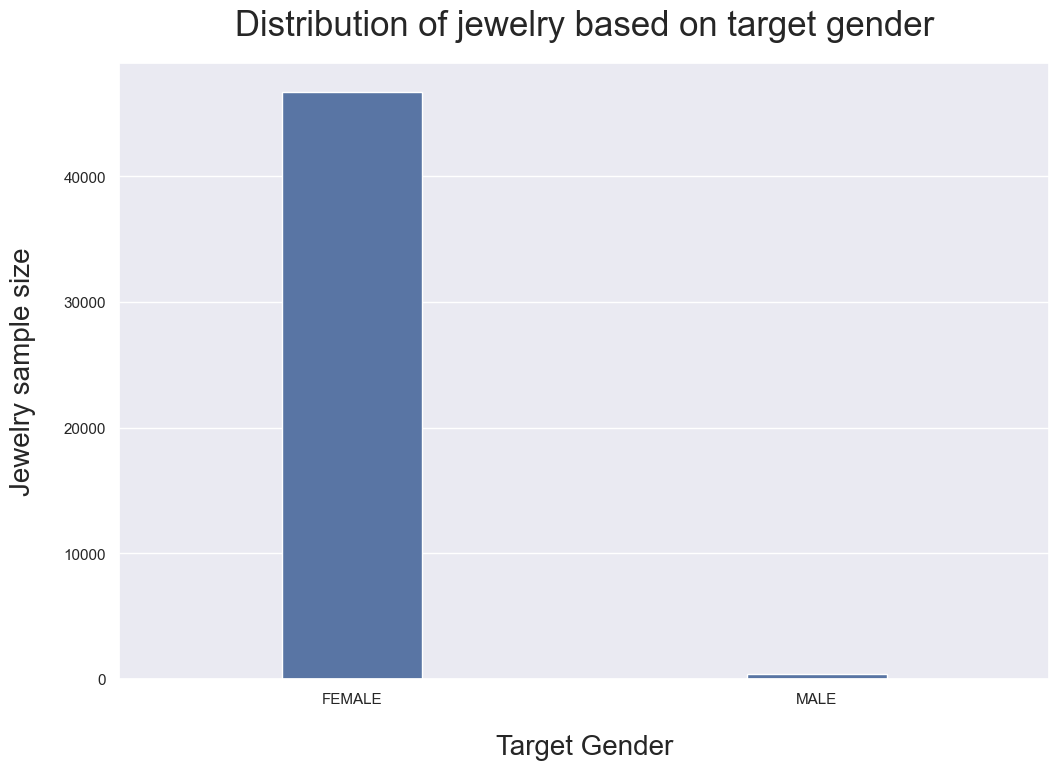

In [16]:
# Visualize jewelry distribution by gender
plt.figure(figsize = (12, 8))

sns.countplot(data=data, x = "Target_Gender", width = 0.3)
plt.title("Distribution of jewelry based on target gender", fontsize=25, pad=20)

plt.xlabel("Target Gender", fontsize=20, labelpad=20)
plt.ylabel("Jewelry sample size", fontsize=20, labelpad=20)

plt.xticks([0, 1], ['FEMALE', 'MALE'])

plt.show(); plt.close("all")

Based on the short univariate analysis above, we can conclude that a majority of jewelry pieces are specifically targeted toward women. This would probably be a result of market analysis.

We can thus assume that the __male__ value in the __Target_Gender__ column is a rare one. This leaves us with one of two options:

1. Retain the column or
2. Eliminate the column, as it does not give us much diversity within gender.

Since this state of affairs is an actual representation of the real-world distribution and how the genders interact with jewelry, the final decision we will make here will be to retain the column.

##### Jewelry Category Analysis

It would make some sense to observe the different jewelry categories on sale.

In [17]:
# Jewelry category distribution
data["Category"].value_counts()

Category
jewelry.earring     29047
jewelry.ring        26025
jewelry.pendant     13083
jewelry.bracelet     6129
0.00                 4311
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [18]:
# Top 10 categories by sample size
data["Category"].value_counts()[:10]

Category
jewelry.earring       29047
jewelry.ring          26025
jewelry.pendant       13083
jewelry.bracelet       6129
0.00                   4311
jewelry.necklace       2335
jewelry.brooch         1286
jewelry.souvenir        170
electronics.clocks      165
40.82                    54
Name: count, dtype: int64

In [19]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

From the short analysis done above, it can be seen that a portion of the data has been corrupted. Rather than containing the accurate jewelry categories, some records contain stringified numerical values instead. This may be due to a number of possible issues such as:

1. Corrupted data recording process
2. Lack of accurate data dictionary (these numerical values may encode some information about other jewelry categories)

Also, it was observed that some records did not describe jewelry, they described electronic clocks instead. These records will have to be filtered out. We can also see that the only jewelry item that seems to be targeted towards the men are _rings_.

We can extract the actual jewelry categories of interest.

In [20]:
# Exctract real jewelry categories
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and c.__contains__("jewelry")]

In [21]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [22]:
# Extract records with the real categories
real_categories = data.loc[data["Category"].isin(categories), :]

In [23]:
# Check for missing values
100 * real_categories.isnull().sum() / len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           3.609048
USD_Price          0.000000
User_ID            0.000000
Target_Gender     36.833082
Main_Color         2.009194
Main_Metal         0.092155
Main_Gem          19.378275
dtype: float64

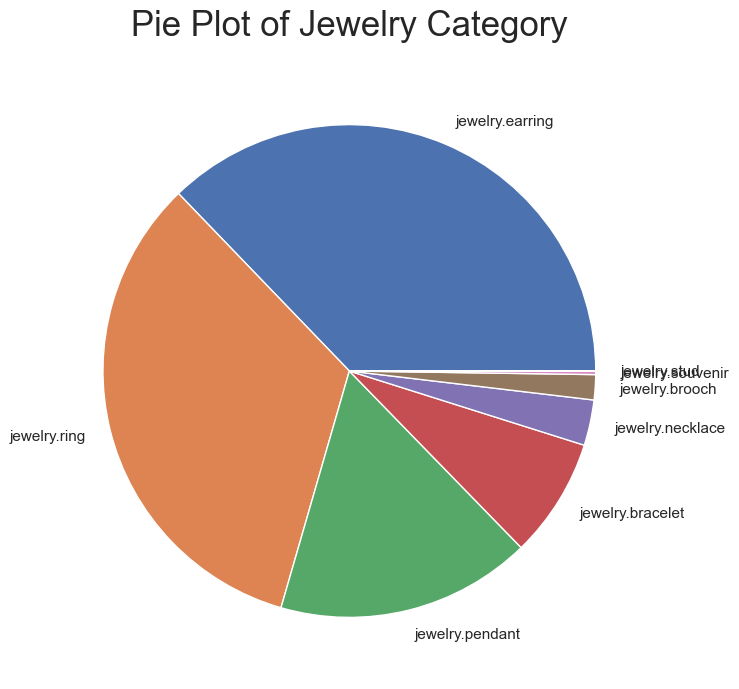

In [24]:
# Visualize the jewelry category via pie chart

jewelry_categories, counts = real_categories["Category"].value_counts().index.tolist(), real_categories["Category"].value_counts().values

plt.figure(figsize = (15, 8))
plt.pie(x=counts, labels=jewelry_categories)

plt.title("Pie Plot of Jewelry Category", fontsize=25, pad=20)

plt.show(); plt.close("all")

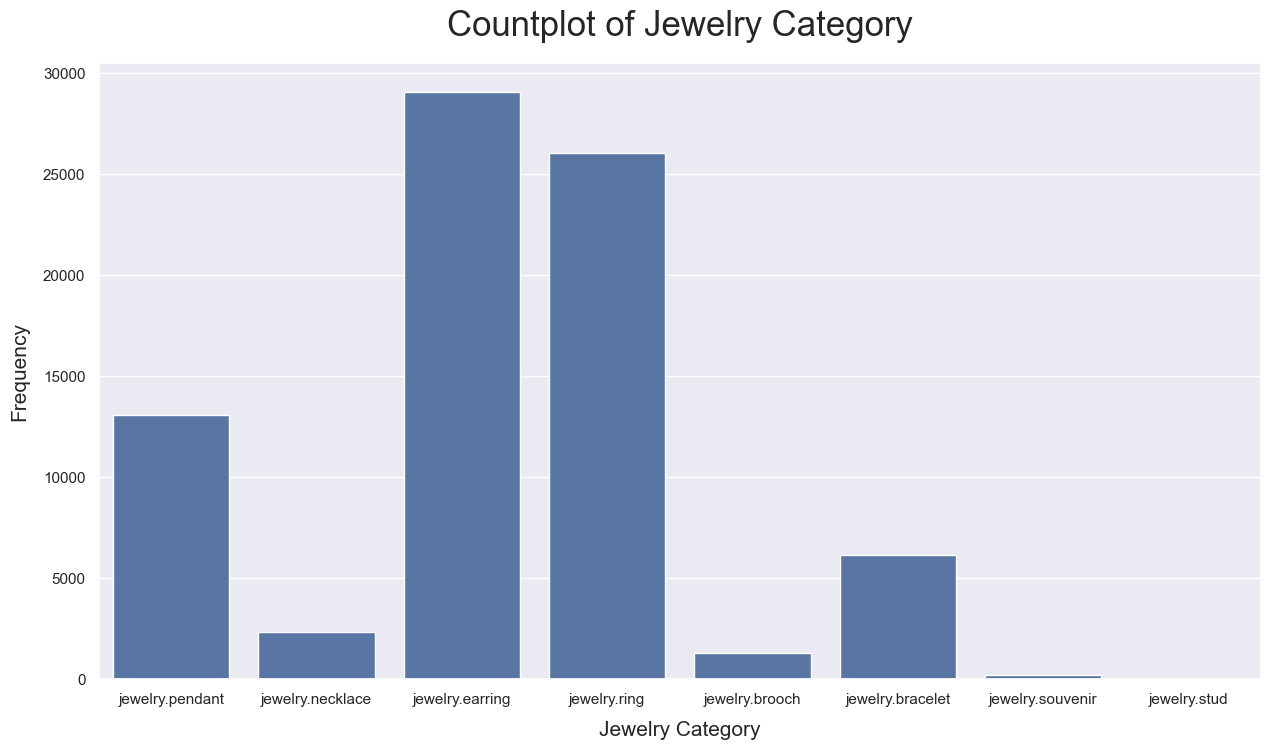

In [25]:
# Visualize the countplot for jewelry category
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category")

plt.title("Countplot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

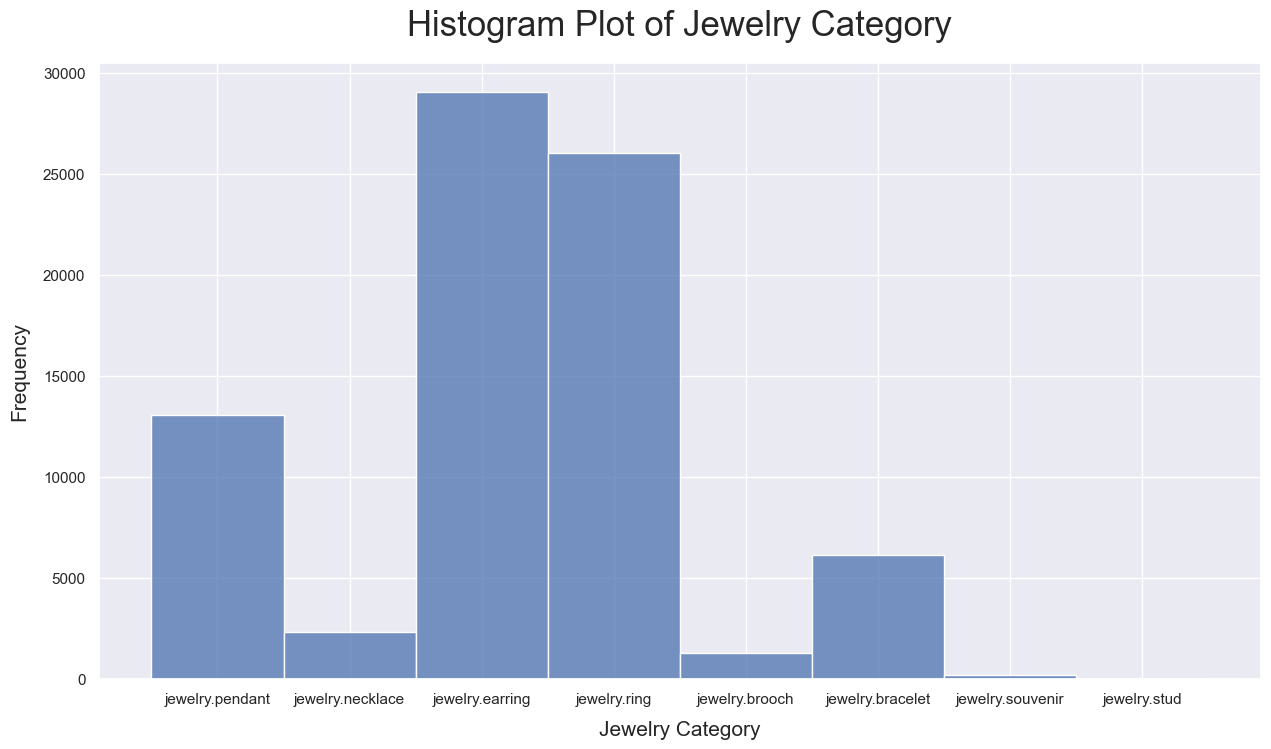

In [26]:
# Visualize the jewelry sample distribution based on jewelry category
plt.figure(figsize = (15, 8))
sns.histplot(data=real_categories, x = "Category")

plt.title("Histogram Plot of Jewelry Category", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

We can also look at a breakdown of the different jewelry categories by target gender.

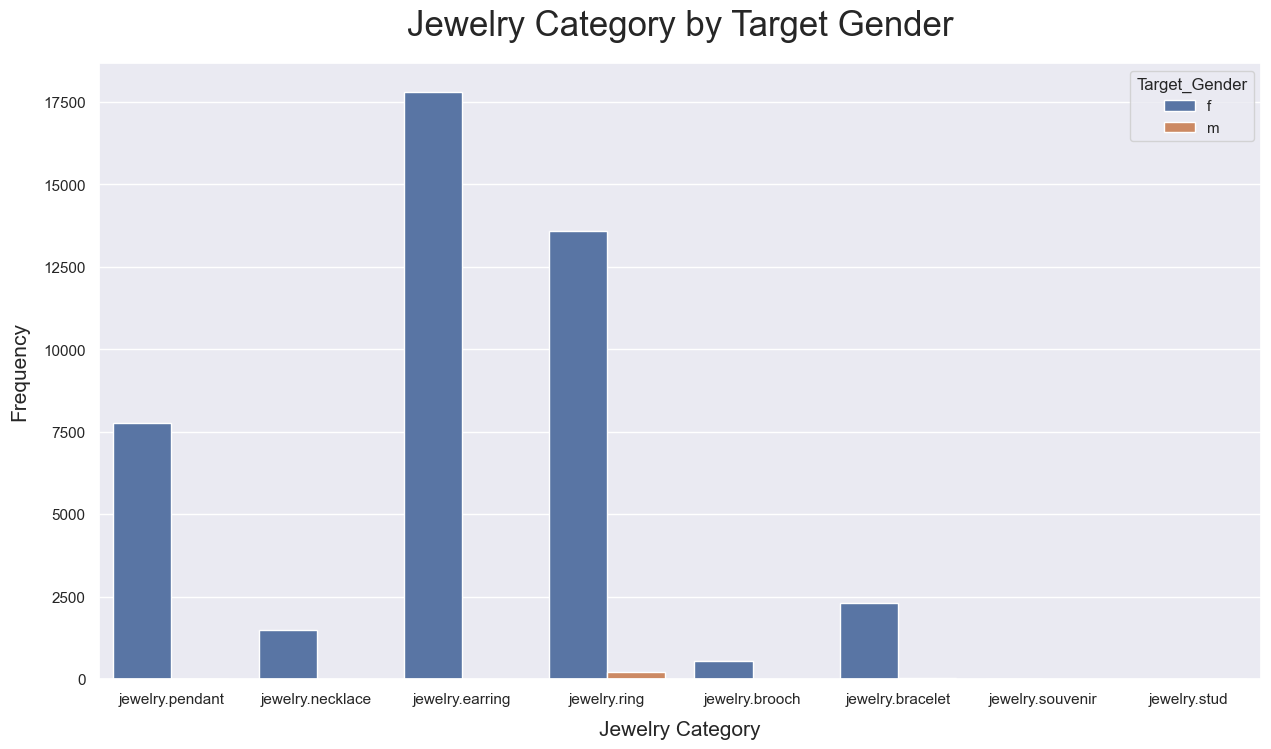

In [27]:
# Jewelry category by gender
plt.figure(figsize = (15, 8))
sns.countplot(data=real_categories, x = "Category", hue = "Target_Gender")

plt.title("Jewelry Category by Target Gender", fontsize=25, pad=20)

plt.xlabel("Jewelry Category", fontsize=15, labelpad=10)
plt.ylabel("Frequency", fontsize=15, labelpad=10)

plt.show(); plt.close("all")

In [28]:
# Jewelry target gender distribution
real_categories["Target_Gender"].value_counts(normalize=True) * 100

Target_Gender
f    99.444114
m     0.555886
Name: proportion, dtype: float64

##### Feature correlation

It would make some sense to observe the features for colinearity. As most of the features in the dataset are categorical, the __Spearman Rank correlation coefficient__ will be utilized.

In [29]:
encoded, category_codes = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [30]:
encoded, category_codes = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [31]:
encoded, category_codes = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [32]:
encoded, category_codes = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [33]:
encoded, category_codes = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [34]:
# Obtain Spearman Rank correlation coeficients for all features
correlations = real_categories.drop(["Order_Datetime", "User_ID", "Order_ID"], axis=1).corr("spearman")

In [35]:
correlations

,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,USD_Price,Target_Gender,Main_Color,Main_Metal,Main_Gem
Product_ID,1.000000,NaN,-0.067612,0.045974,-0.167567,-0.005826,-0.174900,0.007825,-0.070714,-0.085904
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,-0.067612,NaN,1.000000,-0.883445,0.102341,-0.304429,0.092612,-0.005701,0.159114,0.029780
Category,0.045974,NaN,-0.883445,1.000000,-0.103630,0.274393,-0.112309,-0.053113,0.106521,-0.064541
Brand_ID,-0.167567,NaN,0.102341,-0.103630,1.000000,-0.024357,0.621894,0.093239,0.002909,0.058302
USD_Price,-0.005826,NaN,-0.304429,0.274393,-0.024357,1.000000,0.046484,0.009921,-0.175966,-0.014676
Target_Gender,-0.174900,NaN,0.092612,-0.112309,0.621894,0.046484,1.000000,0.045873,-0.049423,0.148043
Main_Color,0.007825,NaN,-0.005701,-0.053113,0.093239,0.009921,0.045873,1.000000,-0.244682,0.127346
Main_Metal,-0.070714,NaN,0.159114,0.106521,0.002909,-0.175966,-0.049423,-0.244682,1.000000,-0.058735
Main_Gem,-0.085904,NaN,0.029780,-0.064541,0.058302,-0.014676,0.148043,0.127346,-0.058735,1.000000


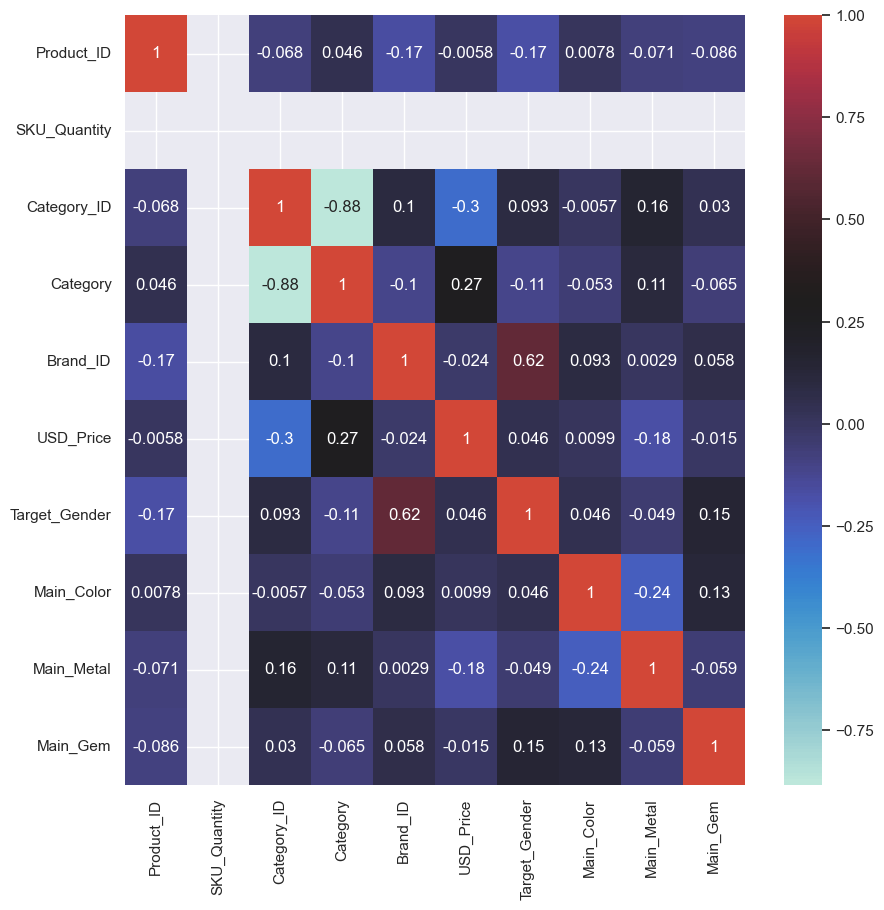

In [36]:
# Correlation heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(correlations, annot=correlations, center=.3)
plt.show()

In [37]:
correlations

,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,USD_Price,Target_Gender,Main_Color,Main_Metal,Main_Gem
Product_ID,1.000000,NaN,-0.067612,0.045974,-0.167567,-0.005826,-0.174900,0.007825,-0.070714,-0.085904
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,-0.067612,NaN,1.000000,-0.883445,0.102341,-0.304429,0.092612,-0.005701,0.159114,0.029780
Category,0.045974,NaN,-0.883445,1.000000,-0.103630,0.274393,-0.112309,-0.053113,0.106521,-0.064541
Brand_ID,-0.167567,NaN,0.102341,-0.103630,1.000000,-0.024357,0.621894,0.093239,0.002909,0.058302
USD_Price,-0.005826,NaN,-0.304429,0.274393,-0.024357,1.000000,0.046484,0.009921,-0.175966,-0.014676
Target_Gender,-0.174900,NaN,0.092612,-0.112309,0.621894,0.046484,1.000000,0.045873,-0.049423,0.148043
Main_Color,0.007825,NaN,-0.005701,-0.053113,0.093239,0.009921,0.045873,1.000000,-0.244682,0.127346
Main_Metal,-0.070714,NaN,0.159114,0.106521,0.002909,-0.175966,-0.049423,-0.244682,1.000000,-0.058735
Main_Gem,-0.085904,NaN,0.029780,-0.064541,0.058302,-0.014676,0.148043,0.127346,-0.058735,1.000000


In [38]:
# Set correlation limits
lower_corr_limits = .2
upper_corr_limits = 1.

In [39]:
correlated_columns = {
    column: correlations[(correlations[column] > lower_corr_limits) & (upper_corr_limits > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [40]:
correlated_columns

{'Product_ID': [],
 'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['USD_Price'],
 'Brand_ID': ['Target_Gender'],
 'USD_Price': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

In [41]:
num_correlated_columns = {k: len(v) for k, v in correlated_columns.items()}

In [42]:
num_correlated_columns

{'Product_ID': 0,
 'SKU_Quantity': 0,
 'Category_ID': 0,
 'Category': 1,
 'Brand_ID': 1,
 'USD_Price': 1,
 'Target_Gender': 1,
 'Main_Color': 0,
 'Main_Metal': 0,
 'Main_Gem': 0}

From the correlation analysis above, it is obvious that most of the features exhibit low correlations with one another and with the target variable itself. This may be taken as a mix of good and bad news.

The good news is that there is little colinearity among the features. This is good for feature independence, which might imply that each variable encodes information that might be relatively orthogonal to the information encoded within other variables. The bad news is, that any model trained in these features might have a difficult time learning anything from the data, as the target variable has little correlation with the independent variables.


#### 2.2. Data Implications

Implied by our findings above, we can say the following:

1. ___Missing values and outliers___: There are a lot of missing values in the dataset. This may be fixed either by value imputation of missingness encoding. As regards outliers, there are quite a lot also. These can be filtered out.

2. ___Data corruption___: Some variables, (e.g., _jewelry_category_) contain corrupt values.

3. ___Rare values___: Some features have some values that occur rarely. A prime instance of this is the _Target_Gender_ column, where the _male_ gender is rarely represented. Sometimes, these are data issues. Other times, like in this case, this can be a true reflection of the distribution from which the data is generated.

4. ___Low cardinality or feature invariance___: The _SKU_Quantity_ feature only has one unique value (e.g., 1). This feature provideds no new information.

5. ___Target skew___: The target variable is highly right-skewed. This can present an issue during training.

6. ___Correlation___: For the most part, the features exhibit low multicollinearity, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independent variables.


---

<div><h3>03. Data Preparation</h3></div>

Based on the *__Data Implications__* discovered prior, the following steps will be experimented upon for the data preparation stage.

1. __Missing Values__: The missing values will be treated via an algorithmic method, ___SimpleImputer___.

2. __Feature Encoding__: The categorical features will be encoded.

3. __Redundant Features__: Certain features will be eliminated for a number of reasons. These are:
   1. _SKU_Quantity_: Feature invariance
   
   2. _Order_ID_: Simple identifier; has no real-world influence on jewelry price.

   3. _Product_ID_: Same with _Order_ID_.

   4. _Order_Datetime_: Avoid data leakage; would not be available in real-world.

4. __Target Skew__: The target variabloe is strongly right-skewed. This can be an issue when learning a mapping from the data space to the label space. Thiis issue will be fixed using the ___TransformedTargetRegressor___ utility.

___NOTE___:
Most of the data preparation steps will be carried out via the use of ___Pipeline___ class from _Sci-kit learn_. The Pipeline object allows us to chain transformers and estimators sequentially for use as one composite object.

<div align="center"><h3>3.1. Enter Data Preparation Code Here</h3></div>


In [43]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

from catboost import CatBoostRegressor

from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
# Columns to drop
to_drop = [
    "SKU_Quantity",
    "Order_ID",
    "Product_ID",
    "Order_Datetime",
    "User_ID",
    "Category_ID"

]

In [45]:
data.drop(labels = to_drop, axis=1, inplace=True)

In [46]:
data.head()

,Category,Brand_ID,USD_Price,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [47]:
data.nunique()

Category          218
Brand_ID         2537
USD_Price        3166
Target_Gender       2
Main_Color          5
Main_Metal          3
Main_Gem           30
dtype: int64

In [48]:
data.shape

(93321, 7)

In [49]:
# Extract records with the real categories

del real_categories
data = data.loc[data["Category"].isin(categories), :]

In [50]:
data.nunique()

Category            8
Brand_ID            6
USD_Price        2849
Target_Gender       2
Main_Color          4
Main_Metal          3
Main_Gem           30
dtype: int64

In [51]:
data.head()

,Category,Brand_ID,USD_Price,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN
5,jewelry.earring,0.0,150.55,NaN,red,gold,diamond


In [52]:
data.isnull().sum()

Category             0
Brand_ID          3368
USD_Price            0
Target_Gender    34373
Main_Color        1875
Main_Metal          86
Main_Gem         18084
dtype: int64

In [53]:
# Extract features and labels
X, y = data.drop(labels = ["USD_Price"], axis=1), data['USD_Price']

In [54]:
# Column indexes
columns = X.columns.tolist()
column_indexes = [i for i in range(len(X.columns))]

In [55]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

---

<div><h3>04. Data Modelling</h3></div>

With the data well-prepared now, the modeling can begin. A number of learning algorithms will be tested. They are:

1. ___Linear Regression___,
2. ___Extremely Random Forest (ExtraTrees)___,
3. ___Adaptive Boosting (AdaBoost)___, and
4. ___Catboost___.

#### 4.1. Modelling

In [56]:
# Categorical columns
categorical_columns = ["Category", "Target_Gender", "Main_Color", "Main_Gem", "Main_Metal"]
categorical_columns_index = [columns.index(c) for c in categorical_columns]

In [57]:
categorical_columns_index

[0, 2, 3, 5, 4]

Here, we will instantiate a data transformation pipeline. We will attempt to do the following:

1. Input missing values (___SimpleImputer___)
2. Encode categorical variables. This can be done via ___OrdinalEncoder___ or ___OneHotEncoder___. The logic behind the final choice will be discussed below.

These transformations discussed are going to be applied optionally. Some models like __Catboost__ do not need any value imputation technique from the user, as they have their internal mechanism for that. Models like linear regression will require it, however. The same idea applies to the process of encoding the categorical variables.

For models like __Catboost__, all we need to do is ensure that these categorical variables are represented as numbers. They can then be handled internally [[CatBoost Docs](https://catboost.ai/en/docs/features/categorical-features)]. For other models like __linear regression__, not only do these variables have to be represented as numbers, but they have to be one-hot encoded to prevent the model from treating them as regular continuous variables.

In [58]:
def pipeline(model, fill_missing = True, set_categorical = True, use_label_encoder = False):
    first_encoder = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy = "most_frequent"), column_indexes),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    second_encoder = ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_columns_index),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    third_encoder = ColumnTransformer(
        transformers = [
            ("label", OrdinalEncoder(), categorical_columns_index),
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    steps = []

    if fill_missing:
        steps.append(("first_encoder", first_encoder))
    if use_label_encoder:
        steps.append(("third_encoder", third_encoder))
    if set_categorical:
        steps.append(("second_encoder", second_encoder))

    steps.append(("model", model))

    model_pipeline = Pipeline(
        steps = steps
    )

    return model_pipeline

In [59]:
# Instantiate mopdel pipelines
cat_pipe = pipeline(
    CatBoostRegressor(loss_function="RMSE", bagging_temperature=.4, iterations=10000, learning_rate=0.1, one_hot_max_size=2),
    fill_missing=False, set_categorical = False, use_label_encoder = True
)

linear_pipe = pipeline(
    LinearRegression(),
    fill_missing=True, set_categorical =True, use_label_encoder = False
)

extra_pipe = pipeline(
    ExtraTreesRegressor(criterion="friedman_mse", n_estimators = 1000, bootstrap=True),
    fill_missing=True, set_categorical =True, use_label_encoder = False
)

ada_pipe = pipeline(
    AdaBoostRegressor(loss="exponential", n_estimators = 1000, learning_rate=.01),
    fill_missing=True, set_categorical =True, use_label_encoder = False
)

In [60]:
# Transform target for all model pipelines
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = "box-cox"))
linear_pipe = TransformedTargetRegressor(regressor = linear_pipe, transformer = PowerTransformer(method = "box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = "box-cox"))

In [61]:
cat_pipe.fit(X_train, y_train)

0:	learn: 0.9566459	total: 99.2ms	remaining: 16m 31s
1:	learn: 0.9208793	total: 121ms	remaining: 10m 6s
2:	learn: 0.8930995	total: 143ms	remaining: 7m 55s
3:	learn: 0.8659360	total: 175ms	remaining: 7m 16s
4:	learn: 0.8459906	total: 205ms	remaining: 6m 50s
5:	learn: 0.8294126	total: 237ms	remaining: 6m 35s
6:	learn: 0.8124553	total: 270ms	remaining: 6m 25s
7:	learn: 0.7973382	total: 307ms	remaining: 6m 22s
8:	learn: 0.7865281	total: 337ms	remaining: 6m 14s
9:	learn: 0.7767989	total: 371ms	remaining: 6m 10s
10:	learn: 0.7684968	total: 392ms	remaining: 5m 56s
11:	learn: 0.7597648	total: 414ms	remaining: 5m 44s
12:	learn: 0.7534756	total: 436ms	remaining: 5m 35s
13:	learn: 0.7478924	total: 457ms	remaining: 5m 25s
14:	learn: 0.7430314	total: 479ms	remaining: 5m 19s
15:	learn: 0.7363634	total: 576ms	remaining: 5m 59s
16:	learn: 0.7316242	total: 677ms	remaining: 6m 37s
17:	learn: 0.7263678	total: 738ms	remaining: 6m 48s
18:	learn: 0.7232753	total: 760ms	remaining: 6m 38s
19:	learn: 0.7189202

TransformedTargetRegressor(regressor=Pipeline(steps=[('third_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('label',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x00000167ACA19150>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [62]:
linear_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [63]:
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [64]:
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second_encoder',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        5,
                                                                                        4])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [69]:
import os
import sys
import shutil
import mlflow.sklearn
# Training code:
if os.path.exists("models/catboost_model"):
    shutil.rmtree("models/catboost_model")

mlflow.sklearn.save_model(
    sk_model=pipeline,
    path="models/catboost_model",
    serialization_format="cloudpickle"
)

2024/12/06 19:05:17 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
C:\Users\Promise Sunday\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [73]:

with mlflow.start_run() as run:
    cat_pipe.fit(X_train, y_train)
    mlflow.sklearn.log_model(cat_pipe, "catboost_model")
    print("Model logged under run ID:", run.info.run_id)


0:	learn: 0.9566459	total: 10.5ms	remaining: 1m 44s
1:	learn: 0.9208793	total: 19ms	remaining: 1m 34s
2:	learn: 0.8930995	total: 26.9ms	remaining: 1m 29s
3:	learn: 0.8659360	total: 35.2ms	remaining: 1m 28s
4:	learn: 0.8459906	total: 43.3ms	remaining: 1m 26s
5:	learn: 0.8294126	total: 51.8ms	remaining: 1m 26s
6:	learn: 0.8124553	total: 60.6ms	remaining: 1m 26s
7:	learn: 0.7973382	total: 71.3ms	remaining: 1m 29s
8:	learn: 0.7865281	total: 82.4ms	remaining: 1m 31s
9:	learn: 0.7767989	total: 92.8ms	remaining: 1m 32s
10:	learn: 0.7684968	total: 103ms	remaining: 1m 33s
11:	learn: 0.7597648	total: 112ms	remaining: 1m 33s
12:	learn: 0.7534756	total: 121ms	remaining: 1m 33s
13:	learn: 0.7478924	total: 130ms	remaining: 1m 33s
14:	learn: 0.7430314	total: 139ms	remaining: 1m 32s
15:	learn: 0.7363634	total: 148ms	remaining: 1m 32s
16:	learn: 0.7316242	total: 157ms	remaining: 1m 31s
17:	learn: 0.7263678	total: 165ms	remaining: 1m 31s
18:	learn: 0.7232753	total: 174ms	remaining: 1m 31s
19:	learn: 0.7

<div align="center"><h3>4.1. Enter Data Modelling Code Here</h3></div>

---

<div><h3>05. Model Evaluation</h3></div>

The trained model is in need of evaluation. The main metrics of interest are ___R2___ and ___RMSE___. This is due to the fact that the problem is a regression problem.

<div align="center"><h3>5.1. Enter Model Evaluation Code Here</h3></div>

#### 5.1. Preliminary Evaluation

Here, we evaluate the preliminary models trained prior.

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
def root_mean_squared_error(y_true, y_pred):
    value = np.sqrt(mean_squared_error(y_true, y_pred))
    return value

In [76]:
def generate_model_score(model, data, metric_name, metric):
    X, y = data
    pred = model.predict(X)
    score = metric(y, pred)
    return score

In [77]:
def print_metrics(metric, train_score, test_score, factor=100, suffix="%"):
    print(f"Train {metric} = {factor * train_score: .3f}{suffix}")
    print(f"Test {metric} = {factor * test_score: .3f}{suffix}")
    print(f"Generalization error = {factor * (train_score - test_score): .3f}{suffix}")

    return

In [78]:
def test_model(model, data, metric_name, metric):
    train, test = data

    if isinstance(metric_name, str):
        train_score = generate_model_score(model, train, metric_name, metric)
        test_score = generate_model_score(model, test, metric_name, metric)

        factor = 1 if metric_name.lower() == "rmse" else 100
        suffix = "" if metric_name.lower() == "rmse" else "%"

        print_metrics(metric_name.lower().capitalize(), train_score, test_score, factor = factor, suffix = suffix)
    else:
        for (name, m) in zip(metric_name, metric):
            train_score = generate_model_score(model, train, name, m)
            test_score = generate_model_score(model, test, name, m)

            factor = 1 if name.lower() == "rmse" else 100
            suffix = "" if name.lower() == "rmse" else "%"

            print_metrics(name.lower().capitalize(), train_score, test_score, factor = factor, suffix = suffix)
            print("="*20 + "\n")

    return

In [79]:
# Metrics
metric_name = ["R2", "RMSE",]
metric = [r2_score, root_mean_squared_error,]

In [80]:
# Test Catboost pipeline
test_model(cat_pipe, [[X_train, y_train], [X_test, y_test]], metric_name, metric)

Train R2 =  31.441%
Test R2 =  31.257%
Generalization error =  0.184%

Train Rmse =  366.187
Test Rmse =  388.268
Generalization error = -22.081



In [81]:
# Test linear regression pipeline
test_model(linear_pipe, [[X_train, y_train], [X_test, y_test]], metric_name, metric)

Train R2 =  7.196%
Test R2 =  6.148%
Generalization error =  1.048%

Train Rmse =  426.043
Test Rmse =  453.669
Generalization error = -27.626



In [82]:
# Test ExtraTrees pipeline
test_model(extra_pipe, [[X_train, y_train], [X_test, y_test]], metric_name, metric)

Train R2 =  21.389%
Test R2 =  21.873%
Generalization error = -0.485%

Train Rmse =  392.115
Test Rmse =  413.920
Generalization error = -21.805



In [83]:
# Test AdaBoost pipeline
test_model(ada_pipe, [[X_train, y_train], [X_test, y_test]], metric_name, metric)

Train R2 =  7.503%
Test R2 =  6.844%
Generalization error =  0.659%

Train Rmse =  425.338
Test Rmse =  451.984
Generalization error = -26.646



#### 5.3 Performance Analysis

Due to stochasticity, running the code multiple times will likely give slightly different results. However, on the whole, we can state the following:

1. All the models seem to have limited performance on this dataset.

2. With respect to R2 score magnitude:

   1. Catboost

   2. ExtraTrees

   3. AdaBoost and

   4. Linear regression

4. The Catboost model seems to have the smallest generalization gap based on R2 score. With respect to the RMSE score though, it seems to have a large gap.

It would seem that the Catboost model performs best. As such, further efforts will be focused on it.

## Set up MLflow

In [84]:
# import needed libraries
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Setup MLflow
mlflow.set_tracking_uri("file:///C:/Users/Promise Sunday/Documents/mlruns")
mlflow.set_experiment("jewelry_price_optimization")

<Experiment: artifact_location='file:///C:/Users/Promise Sunday/Documents/mlruns/353735458978682171', creation_time=1732838852655, experiment_id='353735458978682171', last_update_time=1732838852655, lifecycle_stage='active', name='jewelry_price_optimization', tags={}>

In [92]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def log_model_to_mlflow(model_pipeline, model_name, X_train, X_test, y_train, y_test):
    """
    Log model, parameters, and metrics to MLflow
    """
    with mlflow.start_run(run_name=f"{model_name}_{datetime.now().strftime('%Y%m%d_%H%M%S')}") as run:
        # Get predictions
        train_predictions = model_pipeline.predict(X_train)
        test_predictions = model_pipeline.predict(X_test)
        
        # Calculate metrics
        metrics = {
            "train_r2": r2_score(y_train, train_predictions),
            "test_r2": r2_score(y_test, test_predictions),
            "train_rmse": root_mean_squared_error(y_train, train_predictions),
            "test_rmse": root_mean_squared_error(y_test, test_predictions)
        }
        
        # Log metrics
        mlflow.log_metrics(metrics)
        
        # Try to log model parameters
        try:
            model = model_pipeline.regressor_.named_steps['model']
            params = model.get_params()
            mlflow.log_params(params)
        except:
            print(f"Warning: Could not log parameters for {model_name}")
        
        # Log the model
        try:
            signature = infer_signature(X_train, train_predictions)
            mlflow.sklearn.log_model(
                sk_model=model_pipeline,
                artifact_path=f"{model_name}_model",
                signature=signature
            )
        except Exception as e:
            print(f"Warning: Logging model without signature for {model_name}")
            mlflow.sklearn.log_model(
                sk_model=model_pipeline,
                artifact_path=f"{model_name}_model"
            )
        
        print(f"\nLogged {model_name} model to MLflow")
        print(f"Run ID: {run.info.run_id}")
        print("\nMetrics:")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.4f}")

# Log each model
models = {
    "catboost": cat_pipe,
    "linear_regression": linear_pipe,
    "extra_trees": extra_pipe,
    "adaboost": ada_pipe
}

# Log all models
for name, model in models.items():
    print(f"\nLogging {name} model...")
    try:
        log_model_to_mlflow(model, name, X_train, X_test, y_train, y_test)
    except Exception as e:
        print(f"Error logging {name} model: {str(e)}")


Logging catboost model...

Logged catboost model to MLflow
Run ID: fa4f9c70d4ea4f7b899966c7e79dbef9

Metrics:
train_r2: 0.3144
test_r2: 0.3126
train_rmse: 366.1871
test_rmse: 388.2679

Logging linear_regression model...

Logged linear_regression model to MLflow
Run ID: d2e72bf2acb84defb2beaaeaa52f48ef

Metrics:
train_r2: 0.0720
test_r2: 0.0615
train_rmse: 426.0432
test_rmse: 453.6695

Logging extra_trees model...

Logged extra_trees model to MLflow
Run ID: efc286b2a91949c48346997a323a708b

Metrics:
train_r2: 0.2139
test_r2: 0.2187
train_rmse: 392.1149
test_rmse: 413.9203

Logging adaboost model...

Logged adaboost model to MLflow
Run ID: 520c5fa83a5844568cb41f58ea6b769b

Metrics:
train_r2: 0.0750
test_r2: 0.0684
train_rmse: 425.3378
test_rmse: 451.9839


In [93]:
# Set the experiment and get its ID
experiment = mlflow.set_experiment("jewelry_price_optimization")

# Create a new run with a unique ID
with mlflow.start_run(experiment_id=experiment.experiment_id):
    mlflow.log_param("test_param", 1)
    mlflow.log_metric("test_metric", 100)
    print("Run ID:", mlflow.active_run().info.run_id)
    
print("Test run completed - check MLflow UI!")

Run ID: 20cbec9d64e3448eb2988964f57d99d5
Test run completed - check MLflow UI!


In [94]:
print(f"MLflow version: {mlflow.__version__}")

MLflow version: 2.8.1


As can be seen from the short model optimization carried out above, the model performancce may be considered to have shown very slight improvement in terms of:
- Metric magnitude, and
- Generalization error.

The consequence of this is that the optimized Random Forest model is of better performance than the original out-of-box Random Forest model.

---

<div><h3>06. Model Deployment</h3></div>

With the model performace up to speed, the final artefact needs to be deployed for use. There are a number of options. They include:


1. Local Deployment
   * Flask
   * Django
2. Cloud Deployment
   * AWS
   * GCP
   * Streamlit + GitHub


In [95]:
import os
import sys

In [96]:
model_save_path = "models/catboost_model"
mlflow.sklearn.save_model(pipeline, model_save_path)

MlflowException: Path 'models/catboost_model' already exists and is not empty